Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


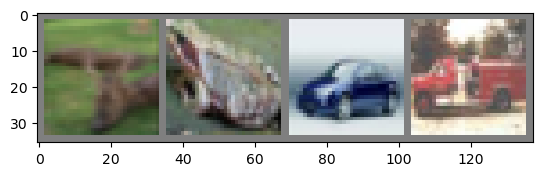

CIFAR-10 labels: ['deer', 'frog', 'automobile', 'truck']


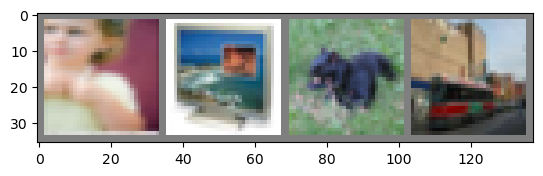

CIFAR-100 labels: ['girl', 'television', 'squirrel', 'streetcar']


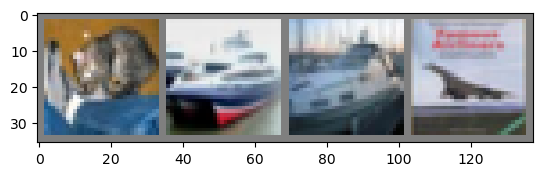

Predicted: ['cat', 'automobile', 'airplane', 'airplane']
Actual: ['cat', 'ship', 'ship', 'airplane']


In [2]:
import torch
import torchvision

import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Download and load CIFAR-10 and CIFAR-100 datasets
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

cifar10_train = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
cifar10_test = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

cifar100_train = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
cifar100_test = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)

# Show example images from CIFAR-10
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(torch.utils.data.DataLoader(cifar10_train, batch_size=4, shuffle=True))
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
print('CIFAR-10 labels:', [cifar10_train.classes[label] for label in labels])

# Show example images from CIFAR-100
dataiter100 = iter(torch.utils.data.DataLoader(cifar100_train, batch_size=4, shuffle=True))
images100, labels100 = next(dataiter100)
imshow(torchvision.utils.make_grid(images100))
print('CIFAR-100 labels:', [cifar100_train.classes[label] for label in labels100])

# Train a simple model on CIFAR-10 (for demonstration, only 1 epoch)
import torch.nn as nn
import torch.optim as optim

class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(16 * 16 * 16, num_classes)
    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = x.view(-1, 16 * 16 * 16)
        x = self.fc1(x)
        return x

net = SimpleCNN(num_classes=10)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

trainloader = torch.utils.data.DataLoader(cifar10_train, batch_size=32, shuffle=True)
for epoch in range(1):  # 1 epoch for demo
    for inputs, targets in trainloader:
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

# Use trained model for prediction
testloader = torch.utils.data.DataLoader(cifar10_test, batch_size=4, shuffle=False)
test_images, test_labels = next(iter(testloader))
outputs = net(test_images)
_, predicted = torch.max(outputs, 1)
imshow(torchvision.utils.make_grid(test_images))
print('Predicted:', [cifar10_test.classes[i] for i in predicted])
print('Actual:', [cifar10_test.classes[i] for i in test_labels])